(weaponized)=
# Weaponized



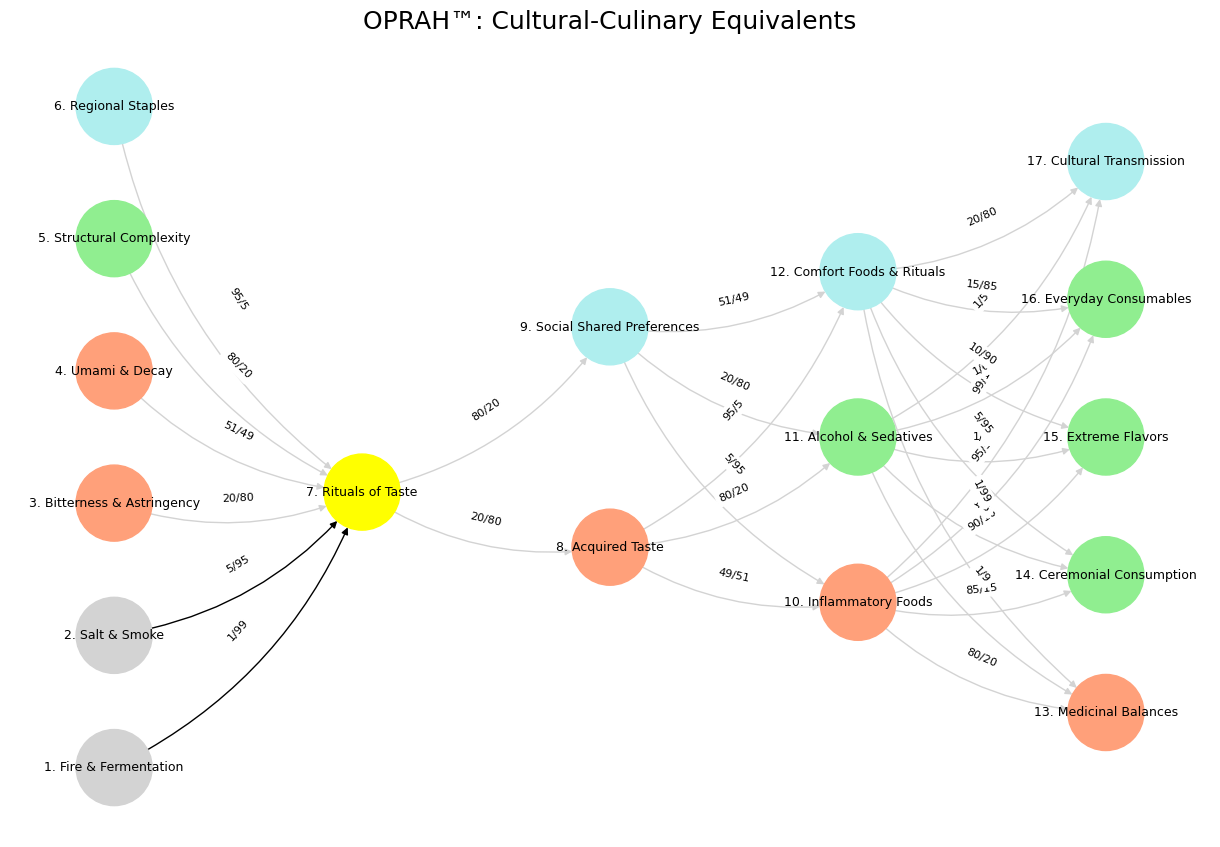

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network layers with new culinary-cultural labels
def define_layers():
    return {
        'Suis': ['Fire & Fermentation', 'Salt & Smoke', 'Bitterness & Astringency', 'Umami & Decay', "Structural Complexity", 'Regional Staples'],
        'Voir': ['Rituals of Taste'],  
        'Choisis': ['Acquired Taste', 'Social Shared Preferences'],  
        'Deviens': ['Inflammatory Foods', 'Alcohol & Sedatives', 'Comfort Foods & Rituals'],  
        "M'élève": ['Medicinal Balances', 'Ceremonial Consumption', 'Extreme Flavors', 'Everyday Consumables', 'Cultural Transmission']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['Rituals of Taste'],  
        'paleturquoise': ['Regional Staples', 'Social Shared Preferences', 'Comfort Foods & Rituals', 'Cultural Transmission'],  
        'lightgreen': ["Structural Complexity", 'Alcohol & Sedatives', 'Ceremonial Consumption', 'Everyday Consumables', 'Extreme Flavors'],  
        'lightsalmon': ['Bitterness & Astringency', 'Umami & Decay', 'Acquired Taste', 'Inflammatory Foods', 'Medicinal Balances'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edge weights
def define_edges():
    return {
        ('Fire & Fermentation', 'Rituals of Taste'): '1/99',
        ('Salt & Smoke', 'Rituals of Taste'): '5/95',
        ('Bitterness & Astringency', 'Rituals of Taste'): '20/80',
        ('Umami & Decay', 'Rituals of Taste'): '51/49',
        ("Structural Complexity", 'Rituals of Taste'): '80/20',
        ('Regional Staples', 'Rituals of Taste'): '95/5',
        ('Rituals of Taste', 'Acquired Taste'): '20/80',
        ('Rituals of Taste', 'Social Shared Preferences'): '80/20',
        ('Acquired Taste', 'Inflammatory Foods'): '49/51',
        ('Acquired Taste', 'Alcohol & Sedatives'): '80/20',
        ('Acquired Taste', 'Comfort Foods & Rituals'): '95/5',
        ('Social Shared Preferences', 'Inflammatory Foods'): '5/95',
        ('Social Shared Preferences', 'Alcohol & Sedatives'): '20/80',
        ('Social Shared Preferences', 'Comfort Foods & Rituals'): '51/49',
        ('Inflammatory Foods', 'Medicinal Balances'): '80/20',
        ('Inflammatory Foods', 'Ceremonial Consumption'): '85/15',
        ('Inflammatory Foods', 'Extreme Flavors'): '90/10',
        ('Inflammatory Foods', 'Everyday Consumables'): '95/5',
        ('Inflammatory Foods', 'Cultural Transmission'): '99/1',
        ('Alcohol & Sedatives', 'Medicinal Balances'): '1/9',
        ('Alcohol & Sedatives', 'Ceremonial Consumption'): '1/8',
        ('Alcohol & Sedatives', 'Extreme Flavors'): '1/7',
        ('Alcohol & Sedatives', 'Everyday Consumables'): '1/6',
        ('Alcohol & Sedatives', 'Cultural Transmission'): '1/5',
        ('Comfort Foods & Rituals', 'Medicinal Balances'): '1/99',
        ('Comfort Foods & Rituals', 'Ceremonial Consumption'): '5/95',
        ('Comfort Foods & Rituals', 'Extreme Flavors'): '10/90',
        ('Comfort Foods & Rituals', 'Everyday Consumables'): '15/85',
        ('Comfort Foods & Rituals', 'Cultural Transmission'): '20/80'
    }

# Define edges to be highlighted in black
def define_black_edges():
    return {
        ('Fire & Fermentation', 'Rituals of Taste'): '1/99',
        ('Salt & Smoke', 'Rituals of Taste'): '5/95',
    }

# Calculate node positions
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    black_edges = define_black_edges()
    
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Create mapping from original node names to numbered labels
    mapping = {}
    counter = 1
    for layer in layers.values():
        for node in layer:
            mapping[node] = f"{counter}. {node}"
            counter += 1
            
    # Add nodes with new numbered labels and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            new_node = mapping[node]
            G.add_node(new_node, layer=layer_name)
            pos[new_node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with updated node labels
    edge_colors = []
    for (source, target), weight in edges.items():
        if source in mapping and target in mapping:
            new_source = mapping[source]
            new_target = mapping[target]
            G.add_edge(new_source, new_target, weight=weight)
            edge_colors.append('black' if (source, target) in black_edges else 'lightgrey')
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    edges_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("OPRAH™: Cultural-Culinary Equivalents", fontsize=18)
    plt.show()

# Run the visualization
visualize_nn()


```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Challenge_vs_skill.svg/600px-Challenge_vs_skill.svg.png
---
width: 100%
height: 100%
---
_Colors Match our Neural Network Model_. Mental state in terms of challenge level and skill level, according to [Csikszentmihalyi's flow model](https://news.uchicago.edu/story/mihaly-csikszentmihalyi-pioneering-psychologist-and-father-flow-1934-2021). The low-skill of anxiety speaks to adversarial transformation, very dynamic in nature that one can only adapt to but never really be well trained for. By contrast, the high-skill of relaxation speaks to culturual homogeneity embodied in heritage, which most adults have mastered. Flow speaks to transactional tokenized settings, wherein rules are somewhat well established -- but there's dynamism that leaks in from adversarial settings. Imagine the neural network as the gradual rise of water in a vast, dynamic ecosystem. At the base, the red nodes pulse like molten magma, vibrant and raw, representing primal energy—the starting point of transformation. With training and calibration, this lava cools and solidifies into yellow, a symbol of emerging order, a river carving its path through the landscape. As the system learns, the water level rises, touching green nodes, which embody flourishing life and iterative growth, where stability begins to bloom amidst the chaos. The verdant hues suggest harmony, a sign that the network is finding its rhythm and the currents are smoothing over time. Finally, with near-zero error—a state of mastery and equilibrium—the system reaches the blue nodes, the serene expanse of a tranquil sea. Here, every ripple aligns, every connection hums with precision, and the water, having risen and filled the network, becomes an ocean of understanding.
```

